# Predicting factors making Candy a Chocolate

Using chocolate dataset, we want to understand what ingredients in a generic candy, make it a chocolate. We will give recommendations to a candy company for making recipe for a new chocolate candy.

## Analysis

In [1]:
import pandas as pd
import numpy as np
from numpy import int64
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('Chocolate.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,Multiple Pieces,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0.0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0.0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0.0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0.0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0.0,0.906,0.511,52.341465


# Cleansing

In [3]:
df = df.drop(['competitorname','winpercent'], axis=1)

In [4]:
df.rename(columns={'Multiple Pieces': 'multiplepieces'},inplace=True)

In [5]:
df.dtypes

chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
multiplepieces      float64
sugarpercent        float64
pricepercent        float64
dtype: object

In [6]:
for col in df.iloc[:,[0,1,2,3,4,5,6,7,8]]:
    print(col,df[col].unique())

chocolate [1 0]
fruity [0 1]
caramel [1 0]
peanutyalmondy [0 1]
nougat [0 1]
crispedricewafer [1 0]
hard [0 1]
bar [1 0]
multiplepieces [ 0. nan  1.]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chocolate         85 non-null     int64  
 1   fruity            85 non-null     int64  
 2   caramel           85 non-null     int64  
 3   peanutyalmondy    85 non-null     int64  
 4   nougat            85 non-null     int64  
 5   crispedricewafer  85 non-null     int64  
 6   hard              85 non-null     int64  
 7   bar               85 non-null     int64  
 8   multiplepieces    61 non-null     float64
 9   sugarpercent      85 non-null     float64
 10  pricepercent      82 non-null     float64
dtypes: float64(3), int64(8)
memory usage: 7.4 KB


plot 1. missing feature distributions


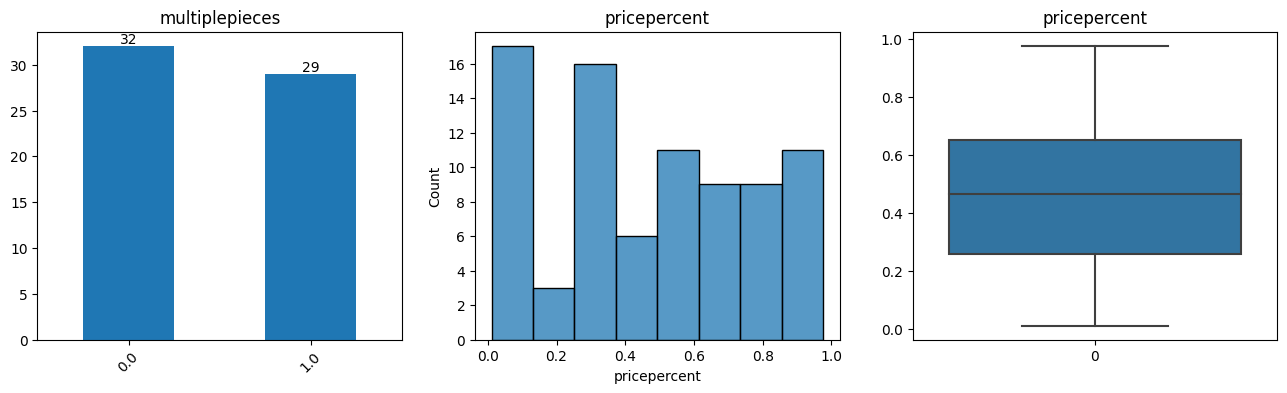

In [8]:
print('\033[1m' + 'plot 1. missing feature distributions' +'\033[0m')
plt.figure(figsize=(16,4))
plt.subplot(1,3,1); ax = df.multiplepieces.value_counts().plot.bar(title='multiplepieces')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,3,2); ax = sns.histplot(data=df.pricepercent).set(title='pricepercent')
plt.subplot(1,3,3); ax = sns.boxplot(data=df.pricepercent).set(title='pricepercent')

In [9]:
print(df.pricepercent.median())
print(df.pricepercent.mean())
print(df.pricepercent.mode())

0.465
0.4671951219756098
0    0.511
Name: pricepercent, dtype: float64


In [10]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df['multiplepieces'].values[df['multiplepieces'] < 0.5] = 0
df['multiplepieces'].values[df['multiplepieces'] > 0.5] = 1

plot 2. distributions after imputation


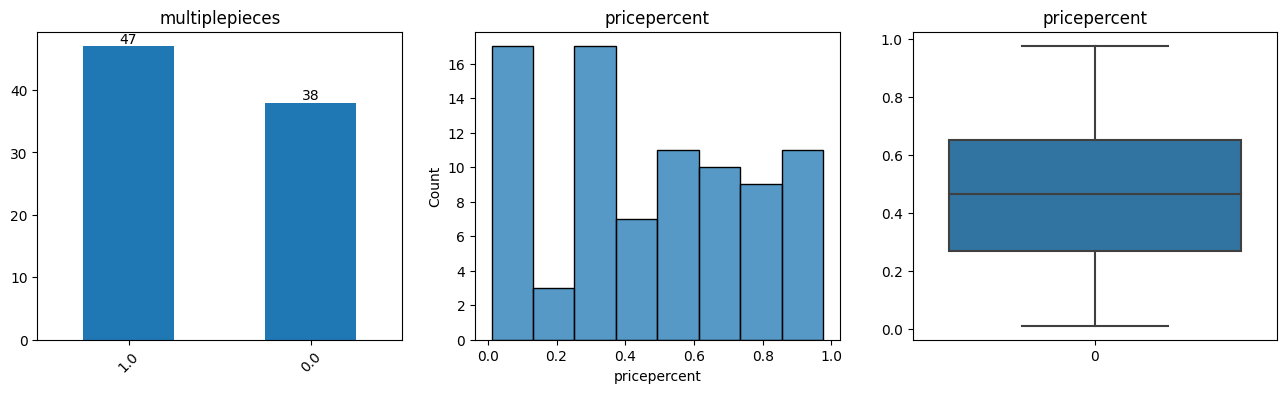

In [11]:
print('\033[1m' + 'plot 2. distributions after imputation' +'\033[0m')
plt.figure(figsize=(16,4))
plt.subplot(1,3,1); ax = df.multiplepieces.value_counts().plot.bar(title='multiplepieces')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,3,2); ax = sns.histplot(data=df.pricepercent).set(title='pricepercent')
plt.subplot(1,3,3); ax = sns.boxplot(data=df.pricepercent).set(title='pricepercent')

In [12]:
print(df.pricepercent.median())
print(df.pricepercent.mean())
print(df.pricepercent.mode())

0.465
0.46759764708705887
0    0.511
Name: pricepercent, dtype: float64


## Anamoly Detection

plot 3. other feature distributions


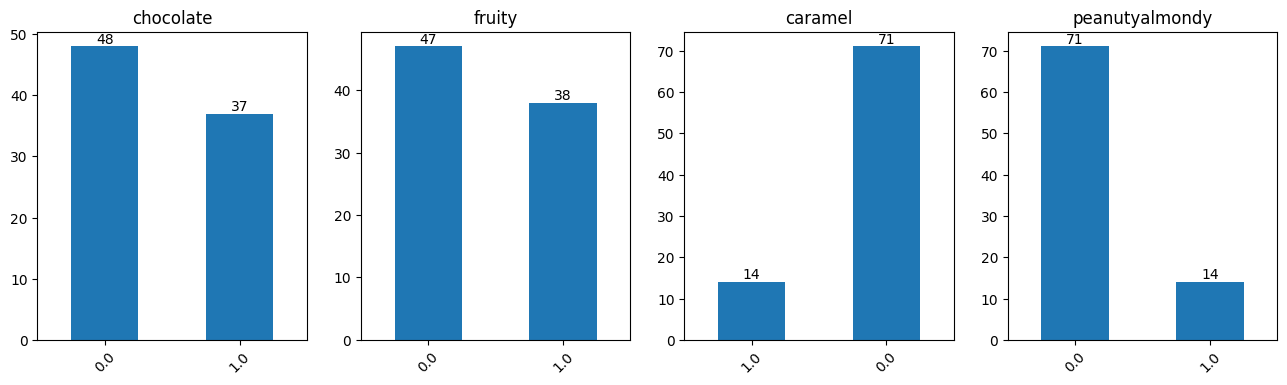

In [13]:
print('\033[1m' + 'plot 3. other feature distributions' +'\033[0m')
plt.figure(figsize=(16,4))
plt.subplot(1,4,1); ax = df.chocolate.value_counts().plot.bar(title='chocolate')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,2); ax = df.fruity.value_counts(sort=False).plot.bar(title='fruity')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,3); ax = df.caramel.value_counts(sort=False).plot.bar(title='caramel')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,4); ax = df.peanutyalmondy.value_counts(sort=False).plot.bar(title='peanutyalmondy')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);

plot 4. other feature distributions


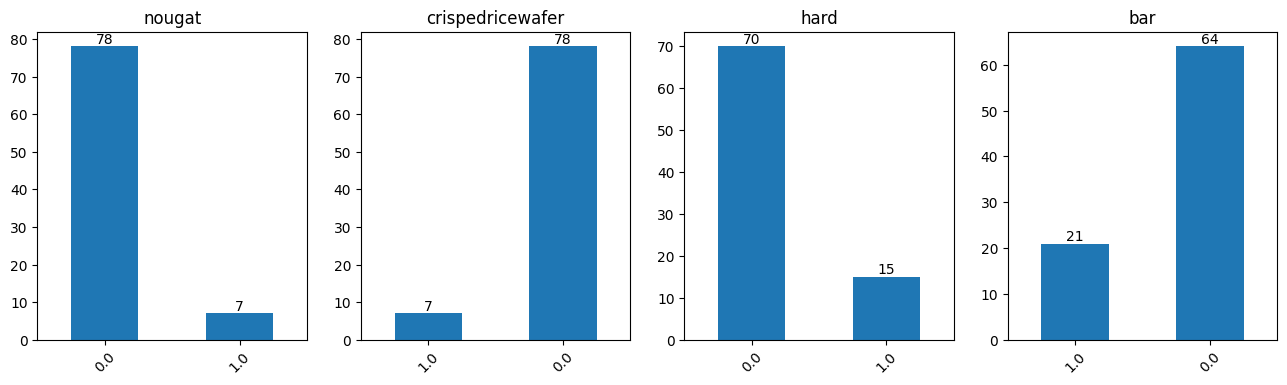

In [14]:
print('\033[1m' + 'plot 4. other feature distributions' +'\033[0m')
plt.figure(figsize=(16,4))
plt.subplot(1,4,1); ax = df.nougat.value_counts().plot.bar(title='nougat')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,2); ax = df.crispedricewafer.value_counts(sort=False).plot.bar(title='crispedricewafer')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,3); ax = df.hard.value_counts(sort=False).plot.bar(title='hard')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,4); ax = df.bar.value_counts(sort=False).plot.bar(title='bar')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);

plot 5. other feature distributions


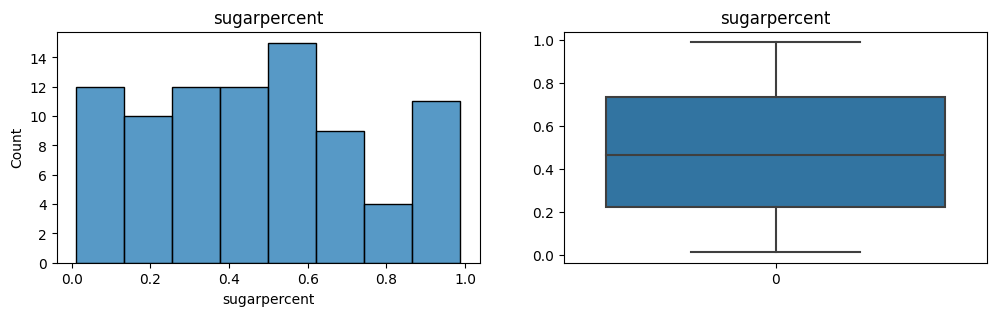

In [15]:
print('\033[1m' + 'plot 5. other feature distributions' +'\033[0m')
plt.figure(figsize=(12,3))
plt.subplot(1,2,1); ax = sns.histplot(data=df.sugarpercent).set(title='sugarpercent')
plt.subplot(1,2,2); ax = sns.boxplot(data=df.sugarpercent).set(title='sugarpercent')

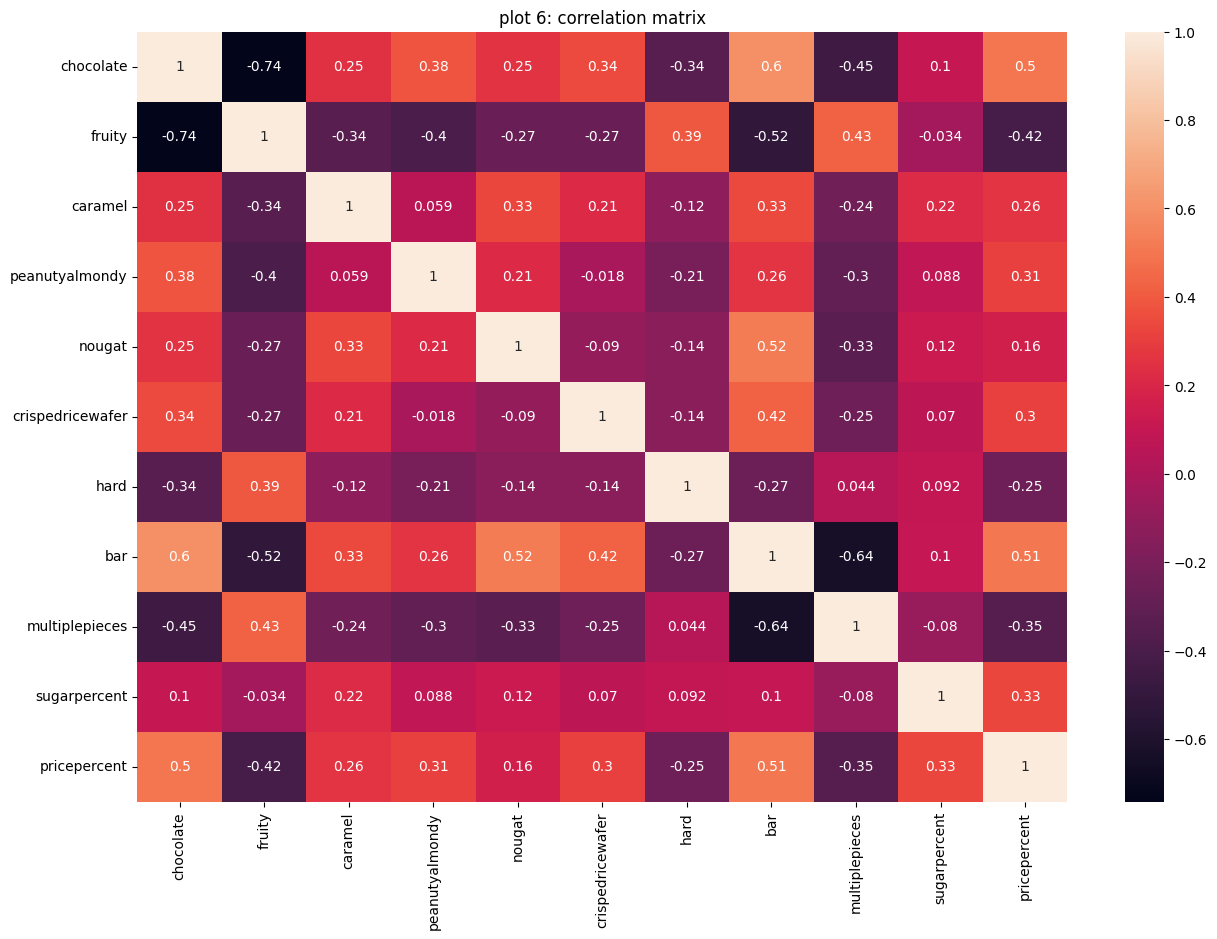

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data=df.corr(),annot=True).set(title='plot 6: correlation matrix');

# Modeling

## Logistic Regression to predict Chocolate & Impactful Variables

In [17]:
# Detecting Multi-collinearity
vif = pd.DataFrame()
dftmp = df.drop(['chocolate','pricepercent'],axis=1)
vif["features"] = dftmp.columns
vif["vif_factor"] = [variance_inflation_factor(dftmp.values, i) for i in range(dftmp.shape[1])]
vif

,features,vif_factor
0,fruity,2.827918
1,caramel,1.559734
2,peanutyalmondy,1.391804
3,nougat,1.910171
4,crispedricewafer,1.677081
5,hard,1.518032
6,bar,2.961871
7,multiplepieces,2.630652
8,sugarpercent,3.440411


In [125]:
y_logr=df[['chocolate']]
x_logr=df.drop(['chocolate','pricepercent'],axis=1)
x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.25)

In [146]:
# Logistic
Xlog2 = sm.add_constant(x_train)
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())

         Current function value: 0.275210
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              chocolate   No. Observations:                   63
Model:                          Logit   Df Residuals:                       53
Method:                           MLE   Df Model:                            9
Date:                Thu, 16 Feb 2023   Pseudo R-squ.:                  0.6011
Time:                        23:46:57   Log-Likelihood:                -17.338
converged:                      False   LL-Null:                       -43.470
Covariance Type:            nonrobust   LLR p-value:                 4.031e-08
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3740      1.145     -0.327      0.744      -2.619       1.871
fruity              -3.2609      1.240     -2.6

C:\Users\soura\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [181]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train,z_train.values.ravel())
z_pred = logreg.predict(x_train)
print(confusion_matrix(z_train, z_pred))
print(classification_report(z_train, z_pred))
z_pred = logreg.predict(x_test)
print(confusion_matrix(z_test, z_pred))
print(classification_report(z_test, z_pred))

[[28  6]
 [ 5 24]]
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84        34
         1.0       0.80      0.83      0.81        29

    accuracy                           0.83        63
   macro avg       0.82      0.83      0.82        63
weighted avg       0.83      0.83      0.83        63

[[11  3]
 [ 1  7]]
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85        14
         1.0       0.70      0.88      0.78         8

    accuracy                           0.82        22
   macro avg       0.81      0.83      0.81        22
weighted avg       0.84      0.82      0.82        22



We are modeling to understand what ingredients determine if candy is chocolate. Hence price percent cannot be a dependent variable to predict if candy is chocolate and is excluded. Logit() function from the statsmodels package is used to analyze coefficients. There is no major multi-collinearity as factors are between 1.5 and 5.5. As the sample size is small (85), it is split into a 75:25 train:test ratio so that the test set is not too small. Only the fruity variable is found to be significant (p-value 0.009). There are no other significant variables even if the significance is increased from 0.05 to 0.10. The coefficient is a good negative number (-3.3), which means that if the candy is fruit flavored, there is a high probability that the candy is NOT chocolate.

When developing new candy, adding fruit flavors can be controlled. Fruit-flavored candy has a higher probability of not being chocolate. Hence, if the candymaker wants to create candy as chocolate, it should avoid adding fruit flavors.

## Decision Tree, Random Forest, Gradient Boosting Models

In [178]:
# Decision Tree
dt_model = DecisionTreeClassifier(criterion="entropy",random_state=123,max_depth=5,min_samples_leaf=20)   
dt_model.fit(x_train,z_train)
# On Train Set
z_pred = dt_model.predict(x_train)
print(confusion_matrix(z_train, z_pred))
print(classification_report(z_train, z_pred))
# On Test Set
z_pred = dt_model.predict(x_test)
print(confusion_matrix(z_test, z_pred))
print(classification_report(z_test, z_pred))

[[26  8]
 [ 1 28]]
              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85        34
         1.0       0.78      0.97      0.86        29

    accuracy                           0.86        63
   macro avg       0.87      0.87      0.86        63
weighted avg       0.88      0.86      0.86        63

[[11  3]
 [ 0  8]]
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.73      1.00      0.84         8

    accuracy                           0.86        22
   macro avg       0.86      0.89      0.86        22
weighted avg       0.90      0.86      0.87        22



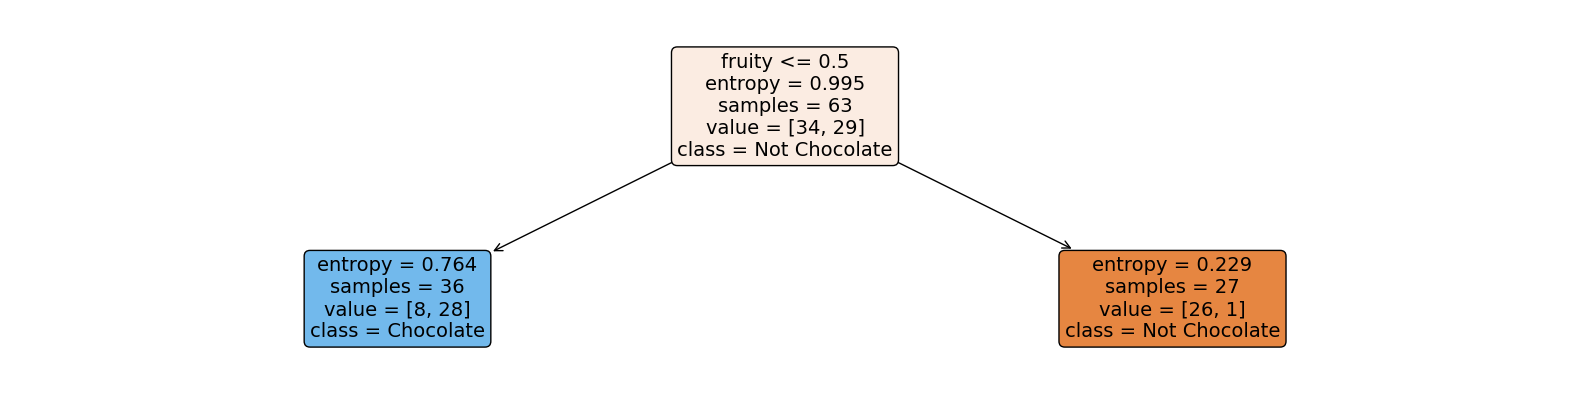

In [152]:
plt.figure(figsize=(20,5))
plot=tree.plot_tree(dt_model,feature_names=x_logr.columns.values.tolist(),class_names=['Not Chocolate','Chocolate'],filled=True,rounded=True,fontsize=14)

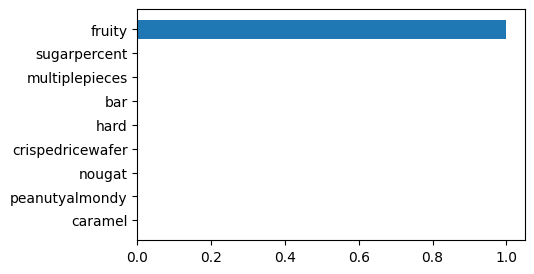

In [153]:
#Feature Importance
importances = dt_model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(5,3))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

In [187]:
#Random Forest
rf_model = RandomForestClassifier(random_state=123,max_depth=5,n_estimators=50)   
rf_model.fit(x_train,z_train.values.ravel())
# On Train Set
z_pred = rf_model.predict(x_train)
print(confusion_matrix(z_train, z_pred))
print(classification_report(z_train, z_pred))
# On Test Set
z_pred = rf_model.predict(x_test)
print(confusion_matrix(z_test, z_pred))
print(classification_report(z_test, z_pred))

[[32  2]
 [ 0 29]]
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        34
         1.0       0.94      1.00      0.97        29

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63

[[11  3]
 [ 1  7]]
              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85        14
         1.0       0.70      0.88      0.78         8

    accuracy                           0.82        22
   macro avg       0.81      0.83      0.81        22
weighted avg       0.84      0.82      0.82        22



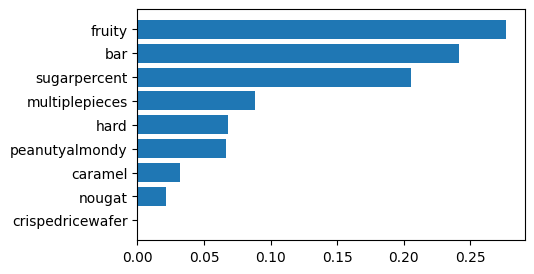

In [155]:
#Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(5,3))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

In [189]:
#Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=123,max_depth=5,n_estimators=100)   
gb_model.fit(x_train,z_train.values.ravel())
# On Train Set
z_pred = gb_model.predict(x_train)
print(confusion_matrix(z_train, z_pred))
print(classification_report(z_train, z_pred))
# On Test Set
z_pred = gb_model.predict(x_test)
print(confusion_matrix(z_test, z_pred))
print(classification_report(z_test, z_pred))

[[34  0]
 [ 0 29]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        34
         1.0       1.00      1.00      1.00        29

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63

[[12  2]
 [ 1  7]]
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89        14
         1.0       0.78      0.88      0.82         8

    accuracy                           0.86        22
   macro avg       0.85      0.87      0.86        22
weighted avg       0.87      0.86      0.87        22



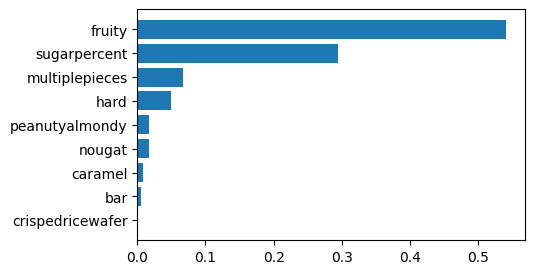

In [157]:
#Feature Importance
importances = gb_model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(5,3))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

The company intends to create a candy that is the best chocolate. Hence with the ingredients given as inputs, when the model predicts candies that are chocolate, the maximum of those candies should actually be chocolate. Thus, false positives should be minimized; hence Precision as an accuracy metric is more important than the others.

For each technique, I used the scikit-learn package functions to build models, fit the model using the train set, predict on the test set, show the confusion matrix, compute the classification report containing the accuracy metrics and derive feature importance. With the entropy criterion, the Decision Tree model returned a precision of 0.73 to predict chocolate and had one split at fruity, which is the only important feature. For the Random Forest technique, I began with 1000 iterations. However, adjusting the parameters for the highest Precision, good accuracy and less time to run the model, the optimum parameters were n_estimators of 50 and max_depth of 5, yielding a precision of 0.70 and top important features as fruity, bar and sugar percentile. Similarly, I began building a Gradient boosting model with 1000 iterations, and the optimum parameters were max_depth of 5 and n_estimators of 100, while the resulting Precision was 0.78, and the top features were fruity and sugar percentile.

Combining knowledge from all models, fruity is the most important feature to develop chocolate, followed by sugar percentile and bar (logically, bar shape can be controlled but is not an ingredient). From correlation, we understand that being fruity reduces the chance of candy being chocolate, and a higher sugar percentile increases the chance of candy being chocolate.

# Model Benchmarking

The confusion matrix for all four models is built using sklearn.metrics and given above. The test set is relatively small, due to small sample size. As mentioned before, we want to minimize FP (act 0, pred 1). From the confusion matrix, we can observe that Gradient Boosting has minimum FP and thus could be a better model.

All models are tuned to perform well. Decision Tree and Gradient Boosting have the highest overall accuracy; however, Gradient Boosting has the highest Precision, which is our focus in this scenario. All models take about 0.5 seconds or less, and we may not put the model into production; hence time to run is not given weightage when choosing the model.

I would recommend the Gradient Boosting model to the candymaker to predict which candies are chocolates because of its highest Precision, Accuracy and is quick to run.

# Conclusion

In this exercise, I analyzed data from competitor candies regarding their ingredients, sugar, price and whether the candy is chocolate. Logistic Regression, Decision Tree, Random Forest and Gradient Boosting techniques were applied to build models to understand what factors in candy-making make it chocolate. I focused on Precision since the maximum of predicted chocolates should be actual chocolates. Accordingly, the Gradient Boosting model performed best as it had the highest Precision and Accuracy while taking half a second to run.

From all the models, we learn that fruity has the highest impact on a candy not being chocolate. Random Forest and Gradient Boosting also reveal that increased sugar percentile is the next factor that decides what makes chocolate. Only Random Forest considerably indicates that bar candies are generally chocolate candies; it is a trend rather than the cause. To conclude, when developing a new candy as the best chocolate, the candy company should not add fruit flavor and should increase sugar content compared to its competitors.